In [1]:
import numpy as np
import pandas as pd
import os
import requests
import io
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
#from scipy.cluster.hierarchy import fcluster
#import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet,linkage
from scipy.spatial.distance import pdist
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering 
import scipy.cluster.hierarchy as shc
import seaborn as sns
!pip install hdbscan
import hdbscan

from sklearn.mixture import GaussianMixture

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 4.7MB 7.2MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2361280 sha256=654e7856fcb8656bf97b58fe3d3955cf43334b09c47bbdac5a9f6d98a8e3e6ec
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/heart.csv"
file=requests.get(url).content
heart_data=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')
heart=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')

In [3]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.891089
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.203480
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000


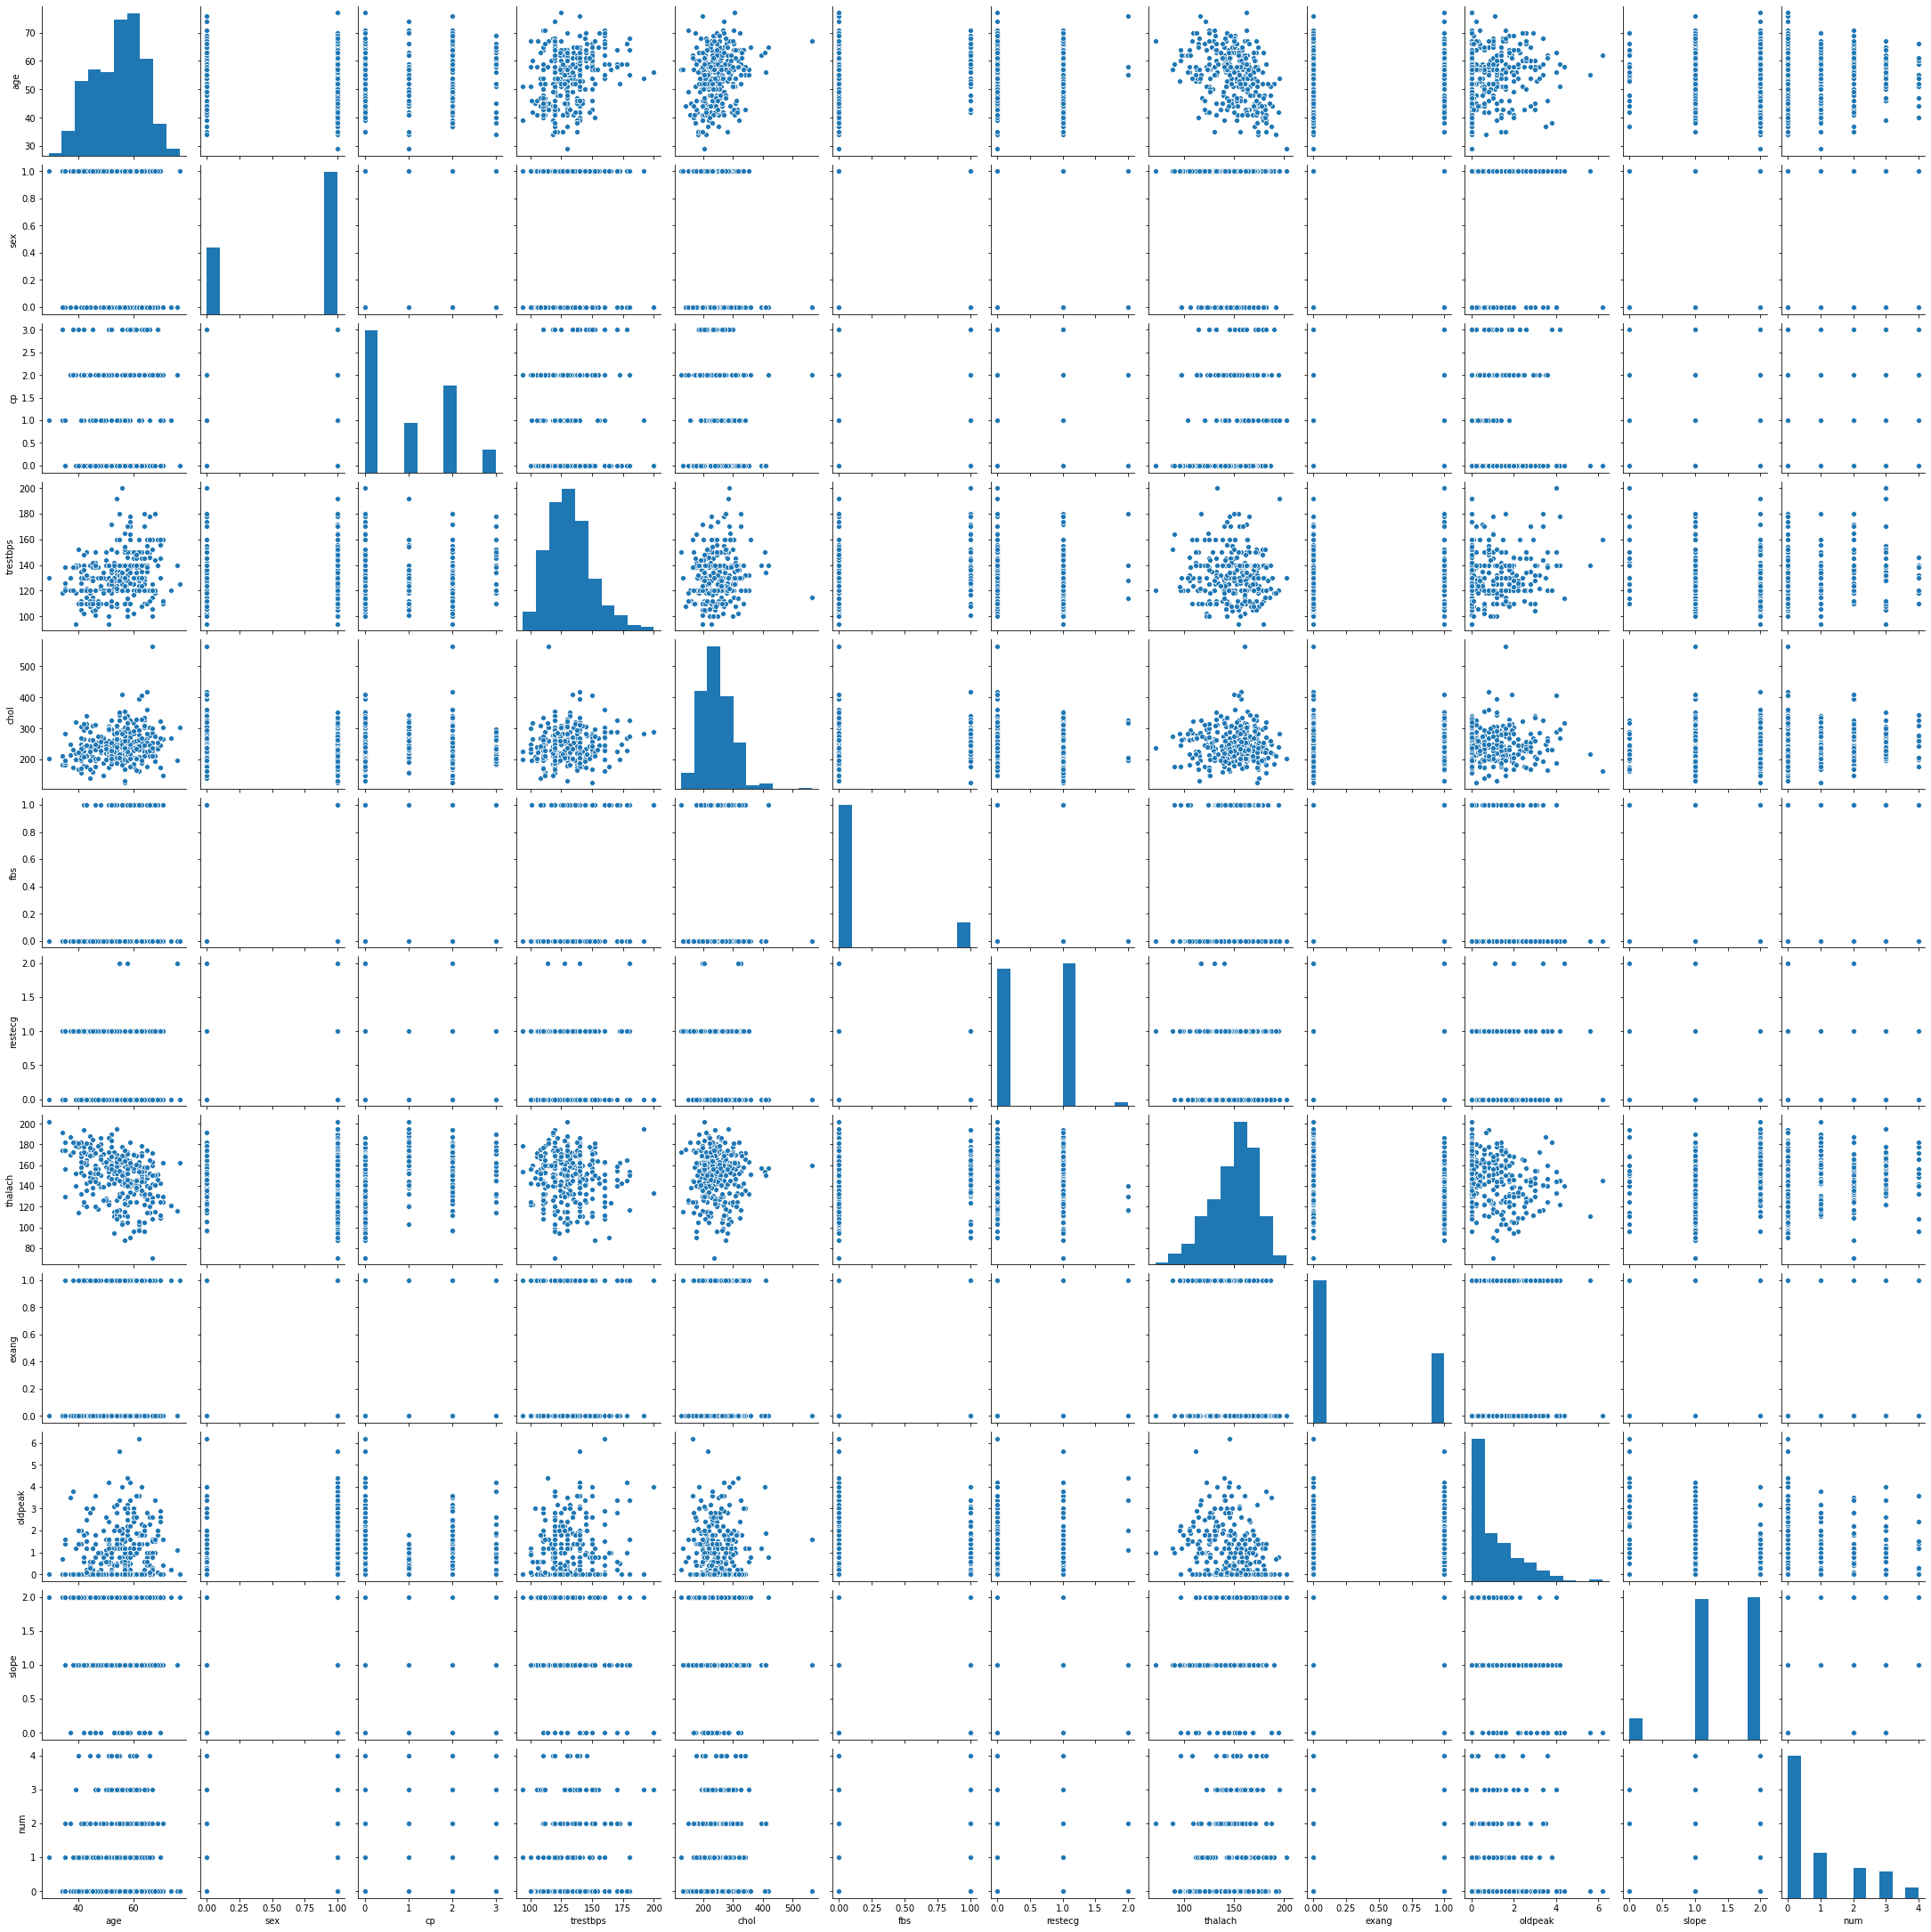

In [4]:
sns.pairplot(heart_data)

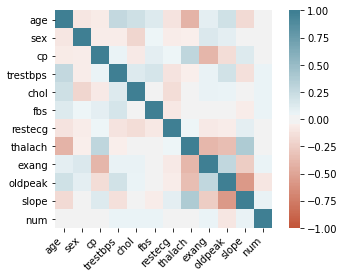

In [5]:
correlation = heart_data.corr()
ax = sns.heatmap(
    correlation, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [6]:
heart_data['chol'].value_counts()

234    6
204    6
197    6
269    5
212    5
      ..
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

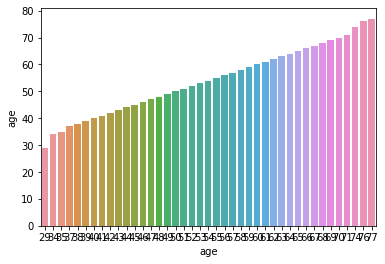

In [7]:
sns.barplot(x=heart_data.groupby('age')['sex'].count().reset_index()['age'],y=heart_data.groupby('age')['sex'].count().reset_index()['age'])

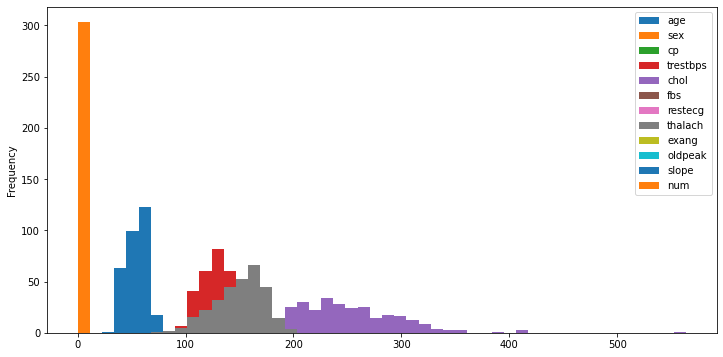

In [8]:
heart_data.plot(kind='hist',bins=50,figsize=(12,6))

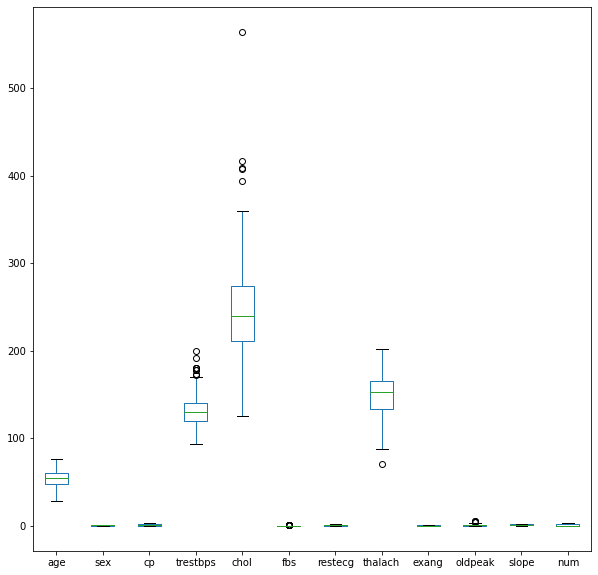

In [9]:
heart_data.plot.box(figsize=(10,10))

In [10]:
heart_data.iloc[:,[0,1,2,3,4,5,6,7]]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach
0,63,1,3,145,233,1,0,150
1,37,1,2,130,250,0,1,187
2,41,0,1,130,204,0,0,172
3,56,1,1,120,236,0,1,178
4,57,0,0,120,354,0,1,163
...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123
299,45,1,3,110,264,0,1,132
300,68,1,0,144,193,1,1,141
301,57,1,0,130,131,0,1,115


In [0]:
X_heart = heart_data.iloc[:,[0,1,2,3,4,5,6,7]]

In [0]:
# Scaling Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_heart)

In [0]:
from sklearn.cluster import KMeans
kmeans_heart = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10)
y_kmeans_heart = kmeans_heart.fit_predict(heart_data)

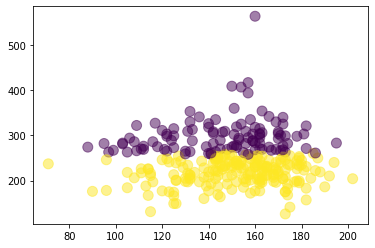

In [14]:
plt.scatter(heart_data.values[:, 7], heart_data.values[:, 4], c=y_kmeans_heart, s=100, alpha=0.5)

# Latent Manifold:

In [0]:
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/disease_life_style.csv"
file=requests.get(url).content
df_heart=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')
heart = pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')



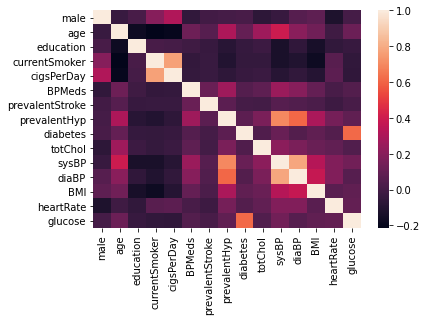

In [17]:
df_heart = df_heart.drop(['TenYearCHD'], axis=1)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_heart.corr())

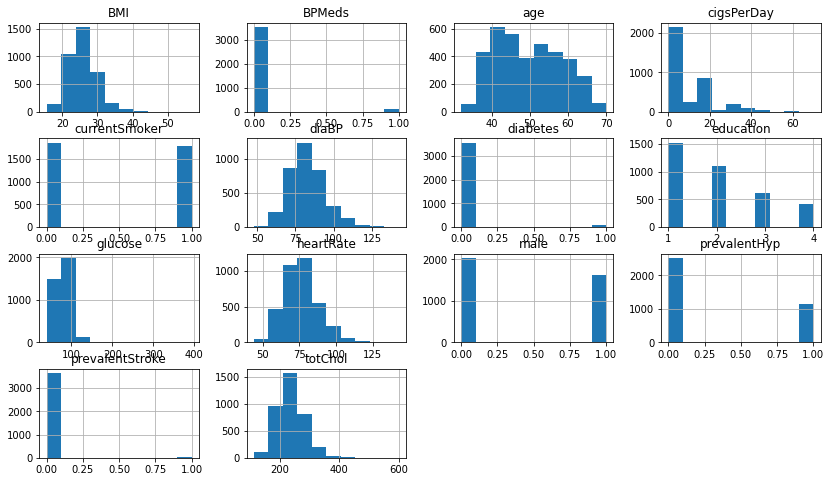

In [18]:
df = df_heart.dropna()
X=df.drop('sysBP',axis=1)
Y=df['sysBP']
X.hist(figsize=(14,8))
plt.show()

In [0]:
X['latent'] = X[['totChol', 'diaBP', 'BMI']].astype(float).sum(1)

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

In [24]:
model = LinearRegression()

Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.30,random_state=2)
model.fit(Xtrain,Ytrain)
y_pred=model.predict(Xtest)
from sklearn.metrics import mean_squared_error
res = mean_squared_error(y_pred, Ytest)
print(res)
model.score(Xtest,Ytest)

128.3372709784308


0.7180130961281748

# Logistic Regression:

In [26]:
heart.rename(columns={'male':'Sex_male'},inplace=True)
heart.isnull().sum()

Sex_male             0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

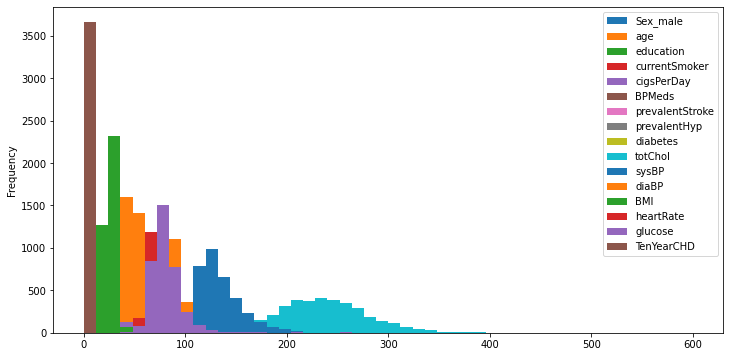

In [30]:
heart.dropna(axis=0,inplace=True)

heart.plot(kind='hist',bins=50,figsize=(12,6))
plt.show()

In [0]:
y = heart[["TenYearCHD"]]
x = heart.drop(["TenYearCHD"], axis=1)


In [42]:
from sklearn.metrics import accuracy_score
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver = 'saga')
logreg.fit(x_train,y_train.values.ravel())
y_pred=logreg.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.8592896174863388


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [43]:
x=heart[['age','BMI', 'heartRate','cigsPerDay','totChol','sysBP','glucose']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=5)
logreg.fit(x_train,y_train.values.ravel())
y_pred=logreg.predict(x_test)

print(accuracy_score(y_test,y_pred))

0.8592896174863388


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


## Conclusion:

1. The Attribute chosen is the health of a individual's heart, which describes if the indvidual can get a heart disease in a period of time.
2. By only selecting the attributes which are planned to be added to the 2nd dataset, we obtain an accuracy of 85%.
3. Our final objective function decsribes the sleep pattern or sleep required for a healthy individual which is predicted using various parameters. Heart rate and releated parameters from this dataset are some of the important features which contribute to our final objective function. 

# Decision Tree:

In [46]:
from sklearn import tree 
Y = heart[['num']]
X = heart.drop(['num'], axis=1)
data_train, data_test, label_train, label_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)
dt2 = tree.DecisionTreeClassifier(random_state=5, max_depth=3)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.6033057851239669
Testing score:  0.5409836065573771


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


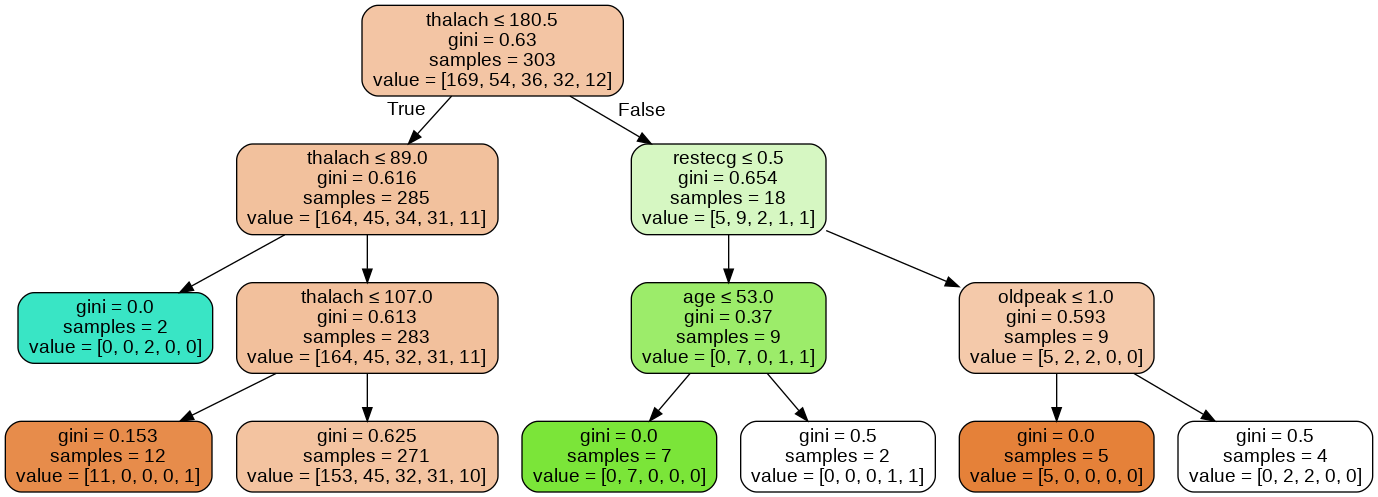

In [47]:
dt3 = tree.DecisionTreeClassifier(random_state=5, max_depth=3)
dtree = dt3.fit(X, Y)
features = X.columns
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names = features, 
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest:

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, bootstrap = True, max_features = 'auto', random_state = 10, max_depth=3)

rf.fit(data_train, label_train.values.ravel())

pred = rf.predict(data_test)
acc_train = rf.score(data_train, label_train)
print(acc_train)
acc = rf.score(data_test,label_test)*100
#accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))

0.5826446280991735
Random Forest Algorithm Accuracy Score : 54.10%


# Naive Bayes:

In [52]:
from sklearn.naive_bayes import GaussianNB
X = heart.drop(['num','sex','cp','fbs','oldpeak','slope','restecg','exang'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 50)
gnb = GaussianNB()
gnb.fit(X_train, Y_train.values.ravel())
y_pred = gnb.predict(X_test)

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score: 0.5246


In [53]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[31  0  1  0  0]
 [12  0  0  0  0]
 [ 7  0  0  1  0]
 [ 7  0  0  1  0]
 [ 1  0  0  0  0]]

True Positives(TP) =  31

True Negatives(TN) =  0

False Positives(FP) =  0

False Negatives(FN) =  12


# Conclusion:
1. Naiye Bayes works well with high dimensional feature space and multi class classification problems. 
2. Our dataset comprises features such as cholestrol, ecg, heartbeat etc and 3 different classifications for heart condition.
3. We were able to improve the accuracy by removing features(sex, cp, fbs, oldpeak, slope, restecg, exang) with negative correlation.